In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline 

# Read data

In [2]:
train_df = pd.read_csv('..\\input\\google_landmark\\train.csv')
test_df = pd.read_csv('..\\input\\google_landmark\\test.csv')
submission = pd.read_csv('..\\input\\google_landmark\\submission_r_imp.csv')

#train_df = pd.read_csv('../input/train.csv')
#test_df = pd.read_csv('../input/test.csv')
#submission = pd.read_csv('../input/sample_submission.csv')

# Inspect the data

## Data shape

In [3]:
print("Train data shape -  rows:",train_df.shape[0]," columns:", train_df.shape[1])
print("Test data size -  rows:",test_df.shape[0]," columns:", test_df.shape[1])

Train data shape -  rows: 1225029  columns: 3
Test data size -  rows: 117703  columns: 2


## Glimpse the data

Let's inspect the train and test sets

In [4]:
train_df.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


Train set has three columns, first being an id for the image, the second being an url for the image and the third the id of the landmark associated with the image.

In [5]:
test_df.head()

,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...


Test set has two columns, first being an id for the image, the second being an url for the image.

Let's see now the expected format for the submission file

In [6]:
submission.head()

,id,landmarks
0,000088da12d664db,14784 0.0000
1,0001623c6d808702,11692 0.0000
2,0001bbb682d45002,13193 0.0001
3,0002362830cfe3a3,14205 0.0000
4,000270c9100de789,10060 0.0000


Submission has two columns, first being an id for the image, the second being the landmark. This has two elements: an landmark id that is associated with the image and its corresponding confidence score. Some query images may contain no landmarks. For these, one can submit no landmark id (and no confidence score).

## Data quality

Let's look into more details to the data quality


### Train data quality

Let's see if we do have missing values in the training set

In [7]:
# missing data in training data set
missing = train_df.isnull().sum()
all_val = train_df.count()

missing_train_df = pd.concat([missing, all_val], axis=1, keys=['Missing', 'All'])
missing_train_df

,Missing,All
id,0,1225029
url,0,1225029
landmark_id,0,1225029


We see that we do not have any missing values (null values) in the training data

### Test data quality

Let's see if we do have missing values in the test set

In [8]:
# missing data in training data set
missing = test_df.isnull().sum()
all_val = test_df.count()

missing_test_df = pd.concat([missing, all_val], axis=1, keys=['Missing', 'All'])
missing_test_df

,Missing,All
id,0,117703
url,0,117703


We can see that we do not have any missing values (null values) in the test data


## Unique values

Let's inspect the train and test data to check now many unique values are


In [9]:
train_df.nunique()

id             1225029
url            1225029
landmark_id      14951
dtype: int64

In the train dataset, there are only 14951 unique landmark_id data. All id's and url's are unique. 

Let's see now the test data to check now many unique values are

In [10]:
test_df.nunique()

id     117703
url    117703
dtype: int64

All id's and url's are unique in the test data as well. Let's now check if we do have any id's or url's that are in both train and test set. 

In [11]:
# concatenate train and test datasets
concatenated = pd.concat([train_df, test_df])
# print the shape of the resulted data.frame
concatenated.shape

(1342732, 3)

In [12]:
concatenated.nunique()

id             1342732
landmark_id      14951
url            1342732
dtype: int64

All id's and url's are unique for the concatenated data. That means we do not have any id's or url's from train dataset leaked in the test data set as well.

## Landmarks

We already know how many distincts landmarks there are in the train set. Let's inspect now how many occurences are for these landscapes in the train set.

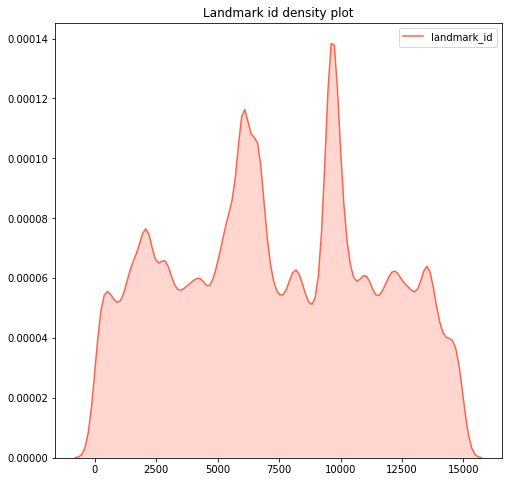

In [13]:
plt.figure(figsize = (8, 8))
plt.title('Landmark id density plot')
sns.kdeplot(train_df['landmark_id'], color="tomato", shade=True)
plt.show()

Let's represent the same data as a density plot

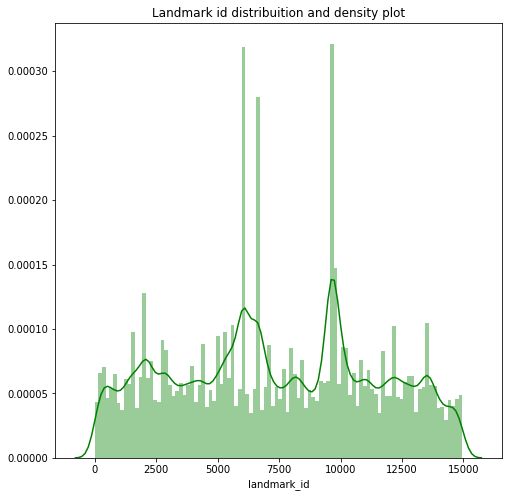

In [14]:
plt.figure(figsize = (8, 8))
plt.title('Landmark id distribuition and density plot')
sns.distplot(train_df['landmark_id'],color='green', kde=True,bins=100)
plt.show()

Let's look now to the most frequent landmarks in the train set and also to the least frequent landmarks.

In [15]:
th10 = pd.DataFrame(train_df.landmark_id.value_counts().head(10))
th10.reset_index(level=0, inplace=True)
th10.columns = ['landmark_id','count']
th10

,landmark_id,count
0,9633,50337
1,6051,50148
2,6599,23415
3,9779,18471
4,2061,13271
5,5554,11147
6,6651,9508
7,6696,9222
8,5376,9216
9,2743,8997


Most frequent landmark has 50337 apparitions in train dataset.

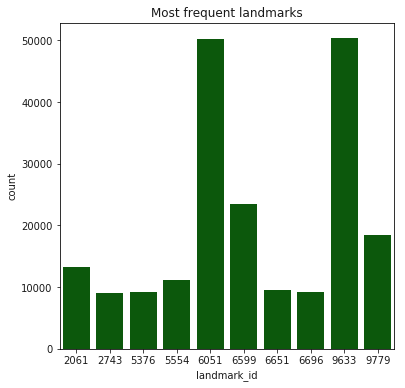

In [16]:
# Plot the most frequent landmark occurences
plt.figure(figsize = (6, 6))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=th10,
            label="Count", color="darkgreen")
plt.show()

In [17]:
tb10 = pd.DataFrame(train_df.landmark_id.value_counts().tail(10))
tb10.reset_index(level=0, inplace=True)
tb10.columns = ['landmark_id','count']
tb10

,landmark_id,count
0,10007,1
1,2683,1
2,4753,1
3,6261,1
4,4144,1
5,1527,1
6,6025,1
7,4334,1
8,5865,1
9,8381,1


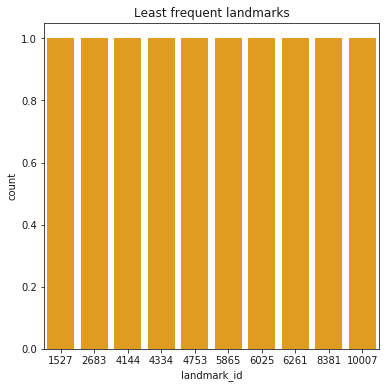

In [18]:
# Plot the least frequent landmark occurences
plt.figure(figsize = (6,6))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=tb10,
            label="Count", color="orange")
plt.show()

Least frequent landmarks have only one occurence in the train dataset.

# Image paths

Let's check the image paths. When we first analyzed the images, we noticed that there are just few main repositories used. Let's try now to find the names of these repositories.

In [19]:
# Extract repositories names for train data
ll = list()
for path in train_df['url']:
    ll.append((path.split('//', 1)[1]).split('/', 1)[0])
train_df['site'] = ll
# Extract repositories names for test data
ll = list()
for path in test_df['url']:
    ll.append((path.split('//', 1)[1]).split('/', 1)[0])
test_df['site'] = ll

Let's check the shape again for train and test datasets.

In [20]:
print("Train data shape -  rows:",train_df.shape[0]," columns:", train_df.shape[1])
print("Test data size -  rows:",test_df.shape[0]," columns:", test_df.shape[1])

Train data shape -  rows: 1225029  columns: 4
Test data size -  rows: 117703  columns: 3


We added to train and test data sets one more column, `site`, storing the name of the image repository. Let's also glimpse the train and test again, to check on the new column values.

In [21]:
train_df.head()

,id,url,landmark_id,site
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676,static.panoramio.com
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651,lh6.ggpht.com
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284,lh6.ggpht.com
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429,lh3.googleusercontent.com
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231,lh5.googleusercontent.com


In [22]:
test_df.head()

,id,url,site
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...,lh3.googleusercontent.com
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...,lh3.googleusercontent.com
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...,lh3.googleusercontent.com
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...,lh3.googleusercontent.com
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...,lh3.googleusercontent.com


Let's group now on `site` name. We process both the train and test data.

In [23]:
train_site = pd.DataFrame(train_df.site.value_counts())
test_site = pd.DataFrame(test_df.site.value_counts())

The sites in train data are:

In [24]:
train_site

,site
lh3.googleusercontent.com,182010
lh4.googleusercontent.com,177774
lh5.googleusercontent.com,175251
lh6.googleusercontent.com,171506
lh3.ggpht.com,105043
lh4.ggpht.com,102460
lh6.ggpht.com,102066
lh5.ggpht.com,100905
mw2.google.com,94947
static.panoramio.com,12468


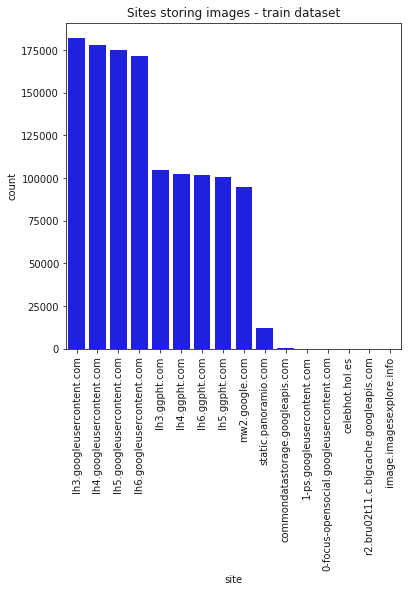

In [43]:
trsite = pd.DataFrame(list(train_site.index),train_site['site'])
trsite.reset_index(level=0, inplace=True)
trsite.columns = ['count','site']
plt.figure(figsize = (6,6))
plt.title('Sites storing images - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'site', y="count", data=trsite, color="blue")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

The sites in test dataset are:

In [25]:
test_site

,site
lh3.googleusercontent.com,116855
lh3.ggpht.com,166
lh5.ggpht.com,134
lh4.ggpht.com,123
images1-focus-opensocial.googleusercontent.com,102
lh6.ggpht.com,92
lh5.googleusercontent.com,80
lh4.googleusercontent.com,55
static.panoramio.com,47
lh6.googleusercontent.com,28


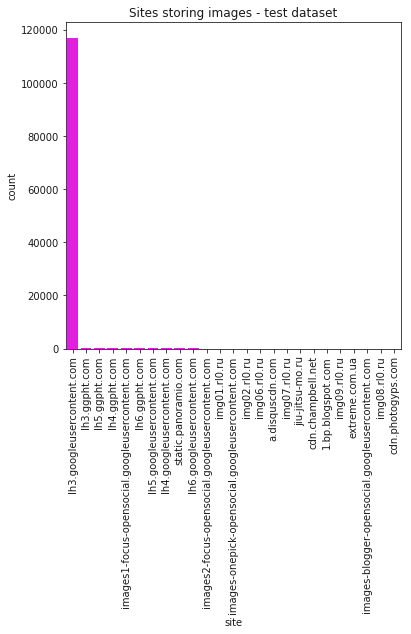

In [45]:
tesite = pd.DataFrame(list(test_site.index),test_site['site'])
tesite.reset_index(level=0, inplace=True)
tesite.columns = ['count','site']
plt.figure(figsize = (6,6))
plt.title('Sites storing images - test dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'site', y="count", data=tesite, color="magenta")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [26]:
def displayLandmark(urls, landmarkName):
    
    img_style = "height: 60px; margin: 2px; float: left; border: 1px solid blue;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.iteritems()])

    display(HTML(images_list))

In [27]:
IMAGES_NUMBER = 60
landmarkId = train_df['landmark_id'].value_counts().keys()[5]
urls = train_df[train_df['landmark_id'] == landmarkId]['url'].head(IMAGES_NUMBER)
display_category(urls, "Petronas")

NameError: name 'display_category' is not defined

In [28]:
urls.head(1)

86    https://lh3.googleusercontent.com/-EpNtXQntMr0...
Name: url, dtype: object

In [29]:
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS


class ImageMetaData(object):
    '''
    Extract the exif data from any image. Data includes GPS coordinates, 
    Focal Length, Manufacture, and more.
    '''
    exif_data = None
    image = None

    def __init__(self, img_path):
        self.image = Image.open(img_path)
        print(self.image._getexif())
        #self.get_exif_data()
        #super(ImageMetaData, self).__init__()

    def get_exif_data(self):
        """Returns a dictionary from the exif data of an PIL Image item. Also converts the GPS Tags"""
        exif_data = {}
        info = self.image._getexif()
        if info:
            for tag, value in info.items():
                decoded = TAGS.get(tag, tag)
                if decoded == "GPSInfo":
                    gps_data = {}
                    for t in value:
                        sub_decoded = GPSTAGS.get(t, t)
                        gps_data[sub_decoded] = value[t]

                    exif_data[decoded] = gps_data
                else:
                    exif_data[decoded] = value
        self.exif_data = exif_data
        return exif_data

    def get_if_exist(self, data, key):
        if key in data:
            return data[key]
        return None

    def convert_to_degress(self, value):

        """Helper function to convert the GPS coordinates 
        stored in the EXIF to degress in float format"""
        d0 = value[0][0]
        d1 = value[0][1]
        d = float(d0) / float(d1)

        m0 = value[1][0]
        m1 = value[1][1]
        m = float(m0) / float(m1)

        s0 = value[2][0]
        s1 = value[2][1]
        s = float(s0) / float(s1)

        return d + (m / 60.0) + (s / 3600.0)

    def get_lat_lng(self):
        """Returns the latitude and longitude, if available, from the provided exif_data (obtained through get_exif_data above)"""
        lat = None
        lng = None
        exif_data = self.get_exif_data()
        #print(exif_data)
        if "GPSInfo" in exif_data:      
            gps_info = exif_data["GPSInfo"]
            gps_latitude = self.get_if_exist(gps_info, "GPSLatitude")
            gps_latitude_ref = self.get_if_exist(gps_info, 'GPSLatitudeRef')
            gps_longitude = self.get_if_exist(gps_info, 'GPSLongitude')
            gps_longitude_ref = self.get_if_exist(gps_info, 'GPSLongitudeRef')
            if gps_latitude and gps_latitude_ref and gps_longitude and gps_longitude_ref:
                lat = self.convert_to_degress(gps_latitude)
                if gps_latitude_ref != "N":                     
                    lat = 0 - lat
                lng = self.convert_to_degress(gps_longitude)
                if gps_longitude_ref != "E":
                    lng = 0 - lng
        return lat, lng


In [30]:
path_name = "C://Users//gpreda//Pictures/Altisource Endava 2017//9V8A9482.jpg"
meta_data =  ImageMetaData(path_name)
latlng =meta_data.get_lat_lng()
print("\nLat-Long information\n================")
print(latlng)
print("\n================")
exif_data = meta_data.get_exif_data()
print(exif_data)

{296: 2, 34665: 218, 271: 'Canon', 272: 'Canon EOS 5D Mark III', 305: 'Adobe Photoshop Lightroom 6.6.1 (Macintosh)', 306: '2017:08:06 23:10:31', 282: (240, 1), 283: (240, 1), 36864: b'0230', 37377: (6965784, 1000000), 37378: (4, 1), 36867: '2017:08:04 13:12:08', 36868: '2017:08:04 13:12:08', 37380: (0, 1), 37381: (3, 1), 37383: 5, 40961: 1, 37385: 9, 37386: (43, 1), 41986: 1, 41987: 1, 41990: 0, 41486: (52428800, 32768), 41487: (52428800, 32768), 41488: 3, 37521: '14', 37522: '14', 33434: (1, 125), 33437: (4, 1), 34850: 1, 41985: 0, 34855: 400, 34864: 2, 42033: '283022003558', 34866: 400, 42034: ((24, 1), (70, 1), (0, 0), (0, 0)), 42036: 'EF24-70mm f/2.8L USM', 42037: '0000000000'}

Lat-Long information
(None, None)

{'ResolutionUnit': 2, 'ExifOffset': 218, 'Make': 'Canon', 'Model': 'Canon EOS 5D Mark III', 'Software': 'Adobe Photoshop Lightroom 6.6.1 (Macintosh)', 'DateTime': '2017:08:06 23:10:31', 'XResolution': (240, 1), 'YResolution': (240, 1), 'ExifVersion': b'0230', 'ShutterSpeed